In [387]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import random

In [375]:
timeframe = 40
stride = 1
num_features = 5

In [376]:
x_train = np.loadtxt('./data/X_train_transformed.csv')
x_train = x_train.reshape(x_train.shape[0], timeframe, num_features)
y_train = np.loadtxt('./data/y_train_transformed.csv').astype(int)
x_test = np.loadtxt('./data/X_test_transformed.csv')
x_test = x_test.reshape(x_test.shape[0], timeframe, num_features)
y_test = np.loadtxt('./data/y_test_transformed.csv').astype(int)

In [377]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21560, 40, 5), (21560,), (5361, 40, 5), (5361,))

In [378]:
n_classes = 3

In [379]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timeframe, num_features)),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')
])

In [380]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [381]:
print(model.summary())

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_27 (Conv1D)              │ (None, 39, 64)         │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 38, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 1216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │        77,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,027 (347.76 KB)

 Trainable params: 89,027 (347.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [382]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [383]:
unique_labels = np.unique(y_train)
class_mapping = {label: i for i, label in enumerate(unique_labels)}
y_train_encoded = np.array([class_mapping[label] for label in y_train])
y_test_encoded = np.array([class_mapping[label] for label in y_test])

In [384]:
history = model.fit(x_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(x_test, y_test_encoded), callbacks=[early_stopping])

Epoch 1/50


674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6783 - loss: 0.6563 - val_accuracy: 0.8866 - val_loss: 0.2514
Epoch 2/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8907 - loss: 0.2361 - val_accuracy: 0.9088 - val_loss: 0.1997
Epoch 3/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9138 - loss: 0.1914 - val_accuracy: 0.9093 - val_loss: 0.1938
Epoch 4/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9234 - loss: 0.1712 - val_accuracy: 0.9148 - val_loss: 0.1681
Epoch 5/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9299 - loss: 0.1554 - val_accuracy: 0.9310 - val_loss: 0.1499
Epoch 6/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9363 - loss: 0.1456 - val_accuracy: 0.9328 - val_loss: 0.1449
Epoch 7/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9387 - loss: 0.1460 - val_accuracy: 0.9409 - val_loss: 0.1345
Epoch 8/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9429 - loss: 0.1338 - val_accuracy: 0.9399 - val_

In [385]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print("Loss:", loss)
print("Accuracy:", accuracy)

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9651 - loss: 0.1022
Loss: 0.09989205747842789
Accuracy: 0.965491533279419


With 1 Conv+Pooling block and 1 Dense layer, accuracy ~= 0.59.

Comparable result when two Conv+Pooling blocks are used.

With one Conv+Conv+Pooling block and 2 Dense layers, accuracy went up to 0.965491533279419.

In [395]:
# selection of 1000 random samples from the test set
random.seed(42)  # Pour obtenir des résultats reproductibles
random_indices = random.sample(range(len(x_test)), 1000)
X_test_sample = x_test[random_indices]
y_test_sample = y_test_encoded[random_indices]

# evaluation of the model on the 1000 samples
y_pred_model = model.predict(X_test_sample)
# we take the class with the highest probability
y_pred_classes = np.argmax(y_pred_model, axis = 1)
accuracy_model = accuracy_score(y_test_sample, y_pred_classes)
precision_model = precision_score(y_test_sample, y_pred_classes, average='weighted')
recall_model = recall_score(y_test_sample, y_pred_classes, average='weighted')
f1_score_model = f1_score(y_test_sample, y_pred_classes, average='weighted')
conf_matrix_model = confusion_matrix(y_test_sample, y_pred_classes)
accuracy_model, precision_model, recall_model, f1_score_model, conf_matrix_model

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


(0.962,
 0.9658600026258679,
 0.962,
 0.9625598640440048,
 array([[ 68,   0,   2],
        [  1, 583,   3],
        [ 19,  13, 311]]))

In [399]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


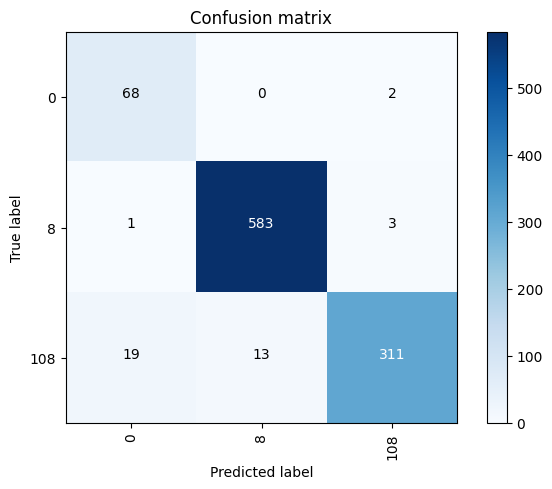

In [401]:
plot_confusion_matrix(conf_matrix_model, classes = [0, 8, 108])
